# File handling, csv files

To work with a file, you must first open it.  
An open file must be closed

In [4]:
filename = '7_FileHandling_csv.ipynb'
fin = open(filename, 'r', encoding='utf8')
...
fin.close()

Or use automatic closing "with ... as  ... ":

In [11]:
with open(filename, 'r', encoding='utf8') as fin:
    ... # do something
# the file is already  closed

### File Opening Modes

    'r' by default, for reading.
    'w' for writing/overwriting, if the file does not exist, it will be created.
    'a' for writing to the end of the file, if the file does not exist, it will be created.
    'b' binary mode (allows you to open non-text files).
    
    'r+' open an existing file for reading and writing.
    'w+' open or create a file for reading and writing, deleting the file contents.
    'a+' open or create a file for reading and writing, appending to the end of the existing file.

#### Rewriting

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter11.01-TXT-Files.html

In [1]:
filename = 'test.txt'

with open(filename, 'w', encoding='utf8') as f:
    for i in range(5):
        f.write(f"This is line {i}\n")

# or
'''
f = open(filename, 'w')

for i in range(5):
    f.write(f"This is line {i}\n")
f.close()
'''

'\nf = open(filename, \'w\')\n\nfor i in range(5):\n    f.write(f"This is line {i}\n")\nf.close()\n'

#### Appending

In [3]:
f = open(filename, 'a')
f.write("This is another line again\n")
f.close()

#### Reading

In [4]:
f = open(filename, 'r')
contents = f.readlines()
f.close()
print(contents)
print()
print(*contents)

['This is line 0\n', 'This is line 1\n', 'This is line 2\n', 'This is line 3\n', 'This is line 4\n', 'This is another line\n', 'This is another line again\n']

This is line 0
 This is line 1
 This is line 2
 This is line 3
 This is line 4
 This is another line
 This is another line again



СEnd-of-line characters are visible in a special text editor mode:

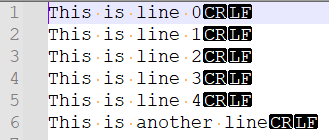

### Text file reading options

* Reading into one single line (read(size) –> str)
* Reading into an array of lines (readlines() –> [str0, str1, ...])
* Reading by line (readline() –> str )
* reading by iterating over lines (for line in fin)
* reading files by list from a file (fileinput.input(files ='gfg.txt')).

Useful methods:

* strip() removes all service characters at the beginning and end of the line (\n, \t, \r)
* Slicing a line by the required characters – split(' ')

In [5]:
filename = 'test.txt'
with open(filename, 'r', encoding='utf8') as fin:
    s = fin.read()
    print(s)

with open(filename, 'r', encoding='utf8') as fin:
    s = fin.read().split(' ')
    print(s)

with open(filename, 'r', encoding='utf8') as fin:
    s = fin.read().split('\n')
    print(s)

This is line 0
This is line 1
This is line 2
This is line 3
This is line 4
This is another line
This is another line again

['This', 'is', 'line', '0\nThis', 'is', 'line', '1\nThis', 'is', 'line', '2\nThis', 'is', 'line', '3\nThis', 'is', 'line', '4\nThis', 'is', 'another', 'line\nThis', 'is', 'another', 'line', 'again\n']
['This is line 0', 'This is line 1', 'This is line 2', 'This is line 3', 'This is line 4', 'This is another line', 'This is another line again', '']


In [23]:
with open(filename, 'r', encoding='utf8') as fin:
    s = fin.readlines()
    print(s)

['This is line 0\n', 'This is line 1\n', 'This is line 2\n', 'This is line 3\n', 'This is line 4\n', 'This is another line\n']


In [24]:
with open(filename, 'r', encoding='utf8') as fin:
    s = fin.readline()
    print(s)
    s = fin.readline().split() # –> [ ]
    print(s)

This is line 0

['This', 'is', 'line', '1']


In [26]:
with open(filename, 'r', encoding='utf8') as fin:
    for line in fin:
    	print(line, end='')
    	#if len(line) == 0:
    	#	break

This is line 0
This is line 1
This is line 2
This is line 3
This is line 4
This is another line


## CSV (comma-separated values) files

    # test.csv
    1,2,3,4
    5,6,7,8
    8,7,5,4

In [6]:
filename = 'test.csv'
string = '1,2,3,4\n5,6,7,8\n8,7,5,4\n8,7,5,4'
with open(filename, 'w', encoding='utf8') as fout:
    fout.write(string)

with open(filename, 'r', encoding='utf8') as fin:
    s = fin.read()
    print(s)

1,2,3,4
5,6,7,8
8,7,5,4
8,7,5,4


### Problem

Read and sum data from test.csv

In [8]:
fin = open('test.csv', 'r') # , encoding='utf-8-sig'
vals = []
for line in fin:
    now = line.split(',')
    print(now)
    print(list(map(int, now)))
    vals.extend(list(map(int, now)))
    
    #vals.extend(list(map(int, now)))

print(vals)
print(sum(vals))
fin.close()

['1', '2', '3', '4\n']
[1, 2, 3, 4]
['5', '6', '7', '8\n']
[5, 6, 7, 8]
['8', '7', '5', '4\n']
[8, 7, 5, 4]
['8', '7', '5', '4']
[8, 7, 5, 4]
[1, 2, 3, 4, 5, 6, 7, 8, 8, 7, 5, 4, 8, 7, 5, 4]
84


#### Problem: 

* Replace map() with a list comprehension.
* Count and sum data using map() and accumulate()/reduce()

PS "The reduce() function of the functools module cumulatively applies the function function to the elements of an iterable sequence, reducing it to a single value." https://docs-python.ru/standart-library/modul-functools-python/funktsija-reduce-modulja-functools/, https://www.geeksforgeeks.org/reduce-in-python/, https://www.geeksforgeeks.org/python-itertools-accumulate/

## csv module, read/write by lines

https://docs.python.org/3/library/csv.html

In [33]:
import csv
with open('eggs.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ') # , newline='', quotechar='|'
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])
	
with open('eggs.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ') # , newline='', quotechar='|'
    for row in spamreader:
        print(', '.join(row))

Spam, Spam, Spam, Spam, Spam, Baked Beans

Spam, Lovely Spam, Wonderful Spam



### Problem:

rewrite reading file 'test.csv' using csv and row

### Problem:

Check the code at tht link  https://realpython.com/lessons/reading-csvs-pythons-csv-module/

PS Documentation of the csv module: https://docs.python.org/3/library/csv.html

    #Employee_birthday.csv
    name,department,birthday month
    John Smith,Accounting,November
    Erica Meyers,IT,March

**Using csv.Reader():**
```python
import csv

with open('employee_birthday.csv') as csv_file:
    csv_reader = csv.Reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        print(f'\t{row[0]} works in the {row[1]} department, and was born in {row[2]}')
```

**Using csv.DictReader():**
```python
import csv

with open('employee_birthday.csv') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        print(f'\t{row["name"]} works in the {row["department"]} department, and was born in {row["month"]}')
```

### Additional link about parsing csv
(also a bit outdated sintaxis)

Python Tutorial: Real World Example - Parsing Names From a CSV to an HTML List – YouTube
https://www.youtube.com/watch?v=GaLHLGdFuz8

https://github.com/CoreyMSchafer/code_snippets/tree/master/Python-Patreon-CSV 


## Reading and writing NumPy arrays

https://note.nkmk.me/en/python-numpy-loadtxt-genfromtxt-savetxt/

#### Writing - numpy.savetxt()

```python
numpy.savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
```

https://numpy.org/doc/2.0/reference/generated/numpy.savetxt.html

In [24]:
import numpy as np
filename = 'np_arr.txt'
arr = np.array([[[1.20, 2.20, 3.00], [4.14, 5.65, 6.42]],[[1.20, 2.20, 3.00], [4.14, 5.65, 6.42]]])
print(arr)
print('\n')
np.savetxt(filename, arr, fmt='%.2f', header = 'Col1 Col2 Col3')
my_arr = np.loadtxt(filename)
print(my_arr)

[[[1.2  2.2  3.  ]
  [4.14 5.65 6.42]]

 [[1.2  2.2  3.  ]
  [4.14 5.65 6.42]]]




ValueError: Expected 1D or 2D array, got 3D array instead

#### Reading - numpy.loadtxt()

```python
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding=None, max_rows=None, *, quotechar=None, like=None)
```

https://numpy.org/doc/2.0/reference/generated/numpy.loadtxt.html

In [13]:
import numpy as np
filename = 'test_np.csv'
data = np.random.random((10,5)) # 10 rows and 5 columns
print(data)
np.savetxt(filename, data, fmt = '%.2f', delimiter=',', header='c1, c2, c3, c4, c5') 
print('\n')
my_csv = np.loadtxt(filename, delimiter=',')
print(my_csv[:5, :2])

[[0.99276837 0.09970337 0.65291394 0.95226272 0.99434027]
 [0.13338934 0.72379064 0.25877007 0.3743269  0.42250398]
 [0.50411671 0.20537145 0.50787403 0.49879651 0.92742316]
 [0.88365994 0.08527913 0.19580927 0.86838628 0.31470654]
 [0.23314567 0.63614144 0.05081468 0.7963366  0.37390265]
 [0.10094174 0.40904401 0.93025815 0.55121616 0.39943422]
 [0.01597122 0.7397467  0.28635882 0.66574033 0.53944361]
 [0.65702762 0.93828522 0.14934733 0.23023392 0.72859728]
 [0.26258106 0.46840516 0.35742714 0.02477606 0.35486521]
 [0.86862878 0.34016798 0.17082801 0.67774574 0.70035204]]


[[0.99 0.1 ]
 [0.13 0.72]
 [0.5  0.21]
 [0.88 0.09]
 [0.23 0.64]]


Skipping multiple lines at the beginning of a file - skiprows:

```python
np.loadtxt(fname, skiprows=N)
```

Import a specific number of rows:
```python
np.loadtxt(fname, max_rows=N)
```

Import only specific columns from index list - usecols:

    #data.csv
    "myfilename",0.034353453,-1.234556,-3.45671234
    ,1.43567896, -1.45322124, 9.543422

```python

import numpy as np

a = np.loadtxt('/tmp/data.csv', usecols=(1,2,3), delimiter=',')
print(a) 
```
Output:

    array([[ 0.03435345, -1.234556  , -3.        ],
           [ 1.43567896, -1.45322124,  9.543422  ]])

(https://stackoverflow.com/questions/20964790/ignoring-string-while-reading-into-an-array)

How can you read a previously opened and already closed file:

```python
import numpy as np

with open('data.txt', 'r') as fp:
    data = fp.read()

np_array = np.array(data)
```

#### Reading -  numpy.genfromtxt()

Allows you to open files with missing values, etc.

```python
numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding=None, *, ndmin=0, like=None)
```

https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html

Using np.genfromtxt(), missing values are read as np.nan

```python
a = np.genfromtxt('data/src/sample_nan.csv', delimiter=',')
print(a)
# [[11. 12. nan 14.]
#  [21. nan nan 24.]
#  [31. 32. 33. 34.]]
```

```python
a = np.genfromtxt('data/src/sample_nan.csv', delimiter=',',
                  filling_values=0)
print(a)
# [[11. 12.  0. 14.]
#  [21.  0.  0. 24.]
#  [31. 32. 33. 34.]]
```

Selecting rows by condition - np.genfromtxt  can take an iterator which yields strings as its first argument:
```python
with open(filename, 'r') as f:
    lines = (line for line in f if predicate(line))
    arr = np.genfromtxt(lines)

```

(https://stackoverflow.com/questions/20301967/numpy-loadtxt-skipping-multiple-rows)

Disadvantages:

1. pandas is more convenient for reading and writing files that contain headers or have both numeric and string columns.
2. No column names

But column names can be imported into a tuple:

For example, data.txt:

    TIME FX FY FZ
    0    10 5  6
    1    2  4  7
    2    5  2  6
    ...
```python
myData = np.genfromtxt("data.txt", names=True)
print(myData.dtype.names)
```
Output:

    ('TIME', 'FX', 'FY', 'FZ')

Get the column names of a python numpy ndarray - Stack Overflow
https://stackoverflow.com/questions/7561017/get-the-column-names-of-a-python-numpy-ndarray

#### joining multiple NumPy arrays

It is often useful to combine several arrays into one (for example, for writing to a file).

numpy.stack joins arrays along a new axis.  
numpy.concatenate join a sequence of arrays along an existing axis.

```python
numpy.stack(arrays, axis=0, out=None, *, dtype=None, casting='same_kind')
```

https://numpy.org/doc/stable/reference/generated/numpy.stack.html

In [15]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print('axis=0:\n', np.stack((a, b)))
print('axis=1:\n', np.stack((a, b), axis=1))
print('axis=1:\n', np.stack((a, b)).T)

axis=0:
 [[1 2 3]
 [4 5 6]]
axis=1:
 [[1 4]
 [2 5]
 [3 6]]
axis=1:
 [[1 4]
 [2 5]
 [3 6]]


In [13]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print('axis=0:\n', np.concatenate((a, b)))

axis=0:
 [1 2 3 4 5 6]


## Reading all files from a folder

https://docs-python.ru/standart-library/modul-os-python/funktsija-listdir-modulja-os/ 

In [21]:
import os 
path = './' 
#filelist = [f for f in os.listdir(path)]
filelist = [f for f in os.listdir(path) if os.path.isfile(path + f)]
# filelist = os.listdir(path) # if you need a folders also


for name in filelist: # 
	print(name) 
#	with open(path + name, "r", encoding='UTF8') as f: 
	with open(path + name, "rb") as f:  # binary because docx files have non-unicade symbols
		text = f.readlines() 


5_VectorizedСalculations_en.html
3_Structures_lists_tuples_dictionaries_sets_en.html
9_Algorithms_complexity_en.html
vertopal.com_problems_examples_en.pdf
4_Functions_Higher-orderFunction_CallStack_en.html
2_DataTypes_operators_ControlFlow_en.html
10_Debugging-logging_en.html
1_Introduction_Python_IPython_en.html
6_Visualization_with_Matplotlib_LaTeX_en.html
7_FileHandling_csv_en.html
11_SimpleNeuralNetwork_en.html
8_Approximation-interpolation_en.html
12_GUI_API_en.html
Appendix_en.html
problems_examples_en.html
vertopal.com_Appendix_en.pdf
vertopal.com_12_GUI_API_en.pdf
vertopal.com_11_SimpleNeuralNetwork_en.pdf
vertopal.com_10_Debugging-logging_en.pdf
vertopal.com_8_Approximation-interpolation_en.pdf
vertopal.com_9_Algorithms_complexity_en.pdf
vertopal.com_7_FileHandling_csv_en.pdf
vertopal.com_6_Visualization withMatplotlib_LaTeX_en.pdf
vertopal.com_5_VectorizedСalculations_en.pdf
vertopal.com_4_Functions_Higher-orderFunction_CallStack_en.pdf
vertopal.com_3_Structures_lists_tuples_

File opening using a mask:

In [22]:
import os 
path = './' 
extensions = ['csv','ipynb']

filelist = [f for f in os.listdir(path) 
            if any(f.endswith(ext) for ext in extensions)]

for name in filelist: # 
	print(name) 
#	with open(path + name, "r", encoding='UTF8') as f: 
	with open(path + name, "rb") as f:  # binary because docx files have non-unicade symbols
		text = f.readlines() 


1_Introduction_Python_IPython_en.ipynb
2_DataTypes_operators_ControlFlow_en.ipynb
3_Structures_lists_tuples_dictionaries_sets_en.ipynb
4_Functions_Higher-orderFunction_CallStack_en.ipynb
5_VectorizedСalculations_en.ipynb
6_Visualization_with_Matplotlib_LaTeX_en.ipynb
7_FileHandling_csv_en.ipynb
8_Approximation-interpolation_en.ipynb
9_Algorithms_complexity_en.ipynb
10_Debugging-logging_en.ipynb
11_SimpleNeuralNetwork_en.ipynb
12_GUI_API_en.ipynb
Appendix_en.ipynb
problems_examples_en.ipynb
test.csv
test_np.csv


## Problems:

1. Generate a data by some function, save to a file, open and print/plot (for example, Plank's law).
2. Open different spectra from a folder.
1. Open LED_royalBlue.csv, plot and normalize a spectrum. Save it in a *.csv file.
2. Open LED280nm.csv, plot spectra, select suitable curves, normalize, calculate average and save it to a file.
3. Do the same with LED370nm.csv.
4. Open groups of files with similar names (a group of 4 files), plot, normalize and average data from them, save averaged to a file.